In [1]:
from mindvision.dataset import Mnist
# Download and process the MNIST dataset.
download_train = Mnist(path="./mnist", split="train", batch_size=32, repeat_num=1, shuffle=True, resize=32, download=True)
download_eval = Mnist(path="./mnist", split="test", batch_size=32, resize=32, download=True)
dataset_train = download_train.run()
dataset_eval = download_eval.run()

[WARNING] ME(5001:139962690744960,MainProcess):2023-05-27-00:59:23.110.753 [mindspore/dataset/core/validator_helpers.py:806] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(5001:139962690744960,MainProcess):2023-05-27-00:59:23.112.945 [mindspore/dataset/core/validator_helpers.py:806] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(5001:139962690744960,MainProcess):2023-05-27-00:59:23.113.548 [mindspore/dataset/core/validator_helpers.py:806] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(5001:139962690744960,MainProcess):2023-05-27-00:59:23.114.170 [mindspore/dataset

In [2]:
# load model lenet
from mindvision.classification.models.backbones import LeNet5
# from mindvision.classification.models import lenet
network = LeNet5()

In [3]:
import mindspore.nn as nn
from mindspore.train import Model
# Define the loss function.
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
# Define the optimizer function.
net_opt = nn.Momentum(network.trainable_params(), learning_rate=0.01, momentum=0.9)

In [4]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig
# Save model
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)
ckpoint = ModelCheckpoint(prefix="lenet", directory="./lenet", config=config_ck)

In [5]:
from mindvision.engine.callback import LossMonitor
# Ini model parameter
model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={'accuracy'})
# Train the network model.
model.train(10, dataset_train, callbacks=[ckpoint, LossMonitor(0.01, 1875)])

Epoch:[  0/ 10], step:[ 1875/ 1875], loss:[0.053/1.017], time:16.820 ms, lr:0.01000
Epoch time: 17928.534 ms, per step time: 9.562 ms, avg loss: 1.017
Epoch:[  1/ 10], step:[ 1875/ 1875], loss:[0.062/0.074], time:18.136 ms, lr:0.01000
Epoch time: 18102.417 ms, per step time: 9.655 ms, avg loss: 0.074
Epoch:[  2/ 10], step:[ 1875/ 1875], loss:[0.119/0.046], time:13.696 ms, lr:0.01000
Epoch time: 18313.513 ms, per step time: 9.767 ms, avg loss: 0.046
Epoch:[  3/ 10], step:[ 1875/ 1875], loss:[0.016/0.038], time:14.092 ms, lr:0.01000
Epoch time: 15663.262 ms, per step time: 8.354 ms, avg loss: 0.038
Epoch:[  4/ 10], step:[ 1875/ 1875], loss:[0.001/0.031], time:41.136 ms, lr:0.01000
Epoch time: 16645.031 ms, per step time: 8.877 ms, avg loss: 0.031
Epoch:[  5/ 10], step:[ 1875/ 1875], loss:[0.002/0.026], time:14.025 ms, lr:0.01000
Epoch time: 19811.843 ms, per step time: 10.566 ms, avg loss: 0.026
Epoch:[  6/ 10], step:[ 1875/ 1875], loss:[0.000/0.023], time:10.535 ms, lr:0.01000
Epoch tim

In [6]:
# Print accuracy
acc = model.eval(dataset_eval)
print(f"{acc}")

{'accuracy': 0.9902844551282052}


In [7]:
# load model
from mindspore import load_checkpoint, load_param_into_net
# Load the saved model used for testing.
param_dict = load_checkpoint("./lenet/lenet-1_1875.ckpt")
# Load parameters to the network.
load_param_into_net(network, param_dict)

[WARNING] ME(5001:139962690744960,MainProcess):2023-05-27-01:02:28.210.974 [mindspore/train/serialization.py:736] For 'load_param_into_net', remove parameter prefix name: backbone., continue to load.


[]

[WARNING] ME(5001:139962690744960,MainProcess):2023-05-27-01:02:31.893.049 [mindspore/dataset/core/validator_helpers.py:806] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(5001:139962690744960,MainProcess):2023-05-27-01:02:31.893.957 [mindspore/dataset/core/validator_helpers.py:806] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(5001:139962690744960,MainProcess):2023-05-27-01:02:31.894.547 [mindspore/dataset/core/validator_helpers.py:806] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(5001:139962690744960,MainProcess):2023-05-27-01:02:31.895.038 [mindspore/dataset

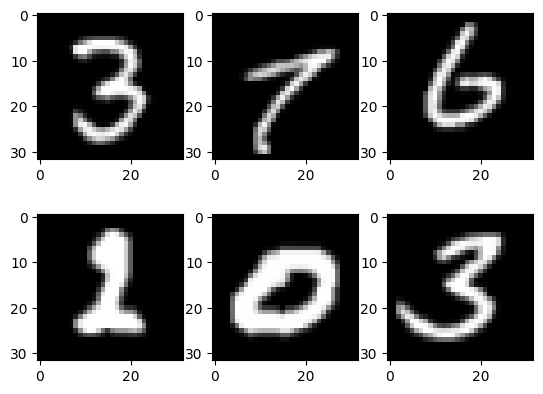

Predicted: "[3 7 6 2 0 3]", Actual: "[3 7 6 2 0 3]"


In [8]:
# use model
import numpy as np
from mindspore import Tensor
import matplotlib.pyplot as plt

mnist = Mnist("./mnist", split="test", batch_size=6, resize=32)
dataset_infer = mnist.run()
ds_test = dataset_infer.create_dict_iterator()
data = next(ds_test)
images = data["image"].asnumpy()
labels = data["label"].asnumpy()

plt.figure()
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(images[i-1][0], interpolation="None", cmap="gray")
plt.show()

# Use the model.predict function to predict the classification of the image.
output = model.predict(Tensor(data['image']))
predicted = np.argmax(output.asnumpy(), axis=1)

# Output the predicted classification and the actual classification.
print(f'Predicted: "{predicted}", Actual: "{labels}"')